In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
fd = pd.read_csv('data_for_lr.csv')
fd.dropna(inplace = True)

In [5]:
fd.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


# Splitting the data

In [6]:
train_input,test_input,train_output,test_output =train_test_split(fd["x"],fd["y"],test_size=0.2,train_size = 0.2,random_state=1)

# Forward propagation

In [7]:
def forward_propagation(train_input , parameters):
    m = parameters['m']
    c = parameters['c']
    prediction = np.multiply(train_input,m) + c 
    return prediction
#cost = 1/2n summation (pred - y)^2 
def cost_function(prediction,train_output):
     cost = np.mean((train_output - prediction )**2) *0.5

     return cost

def backward_propagation(prediction,train_input , train_output):

    derivatives = dict()
    df = (train_output - prediction) 
    dm = np.mean(np.multiply(train_input, df))
    
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc

    
    return derivatives

def update_parameters(parameters, derivatives , learning_rate):
    parameters['m'] = parameters['m']  - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c']  - learning_rate * derivatives['dc']


    return parameters



# Training the Model
sequence:
1. forward_propagation
2. cost_function
3. backward-propagation
4. updating_parameters

In [11]:
def train(train_input, train_output, learning_rate, iters):
    
    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1)  
    parameters["c"] = np.random.uniform(0,1) 
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        #cost function
        cost = cost_function(predictions, train_output)
        
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        #fig, ax = plt.subplots()
        
        # ax.plot(train_input, train_output, '+', label='Original')
        # ax.plot(train_input, predictions, '*', label='Training')

        #legend = ax.legend()
        
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')
        
        
        plt.show()
        
        #back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)
        
        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

Iteration = 1, Loss = 168.3835733868403


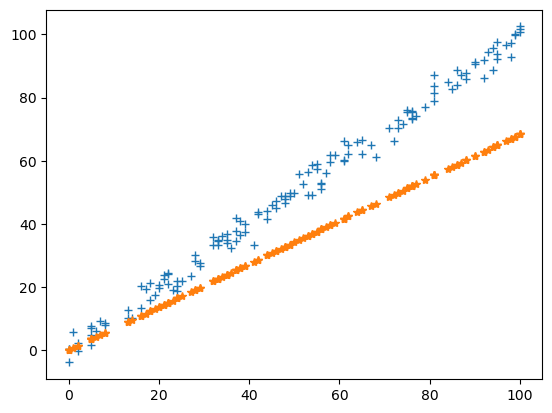

Iteration = 2, Loss = 75.41137103729923


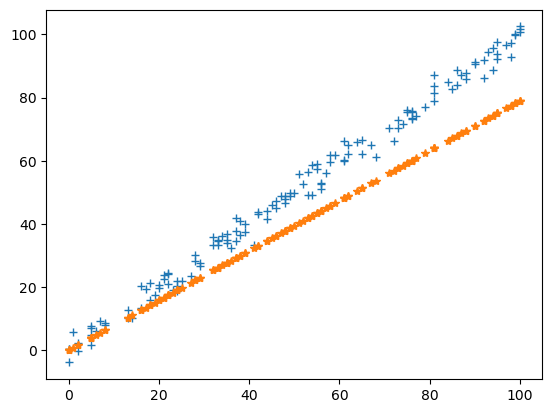

Iteration = 3, Loss = 34.66878634436263


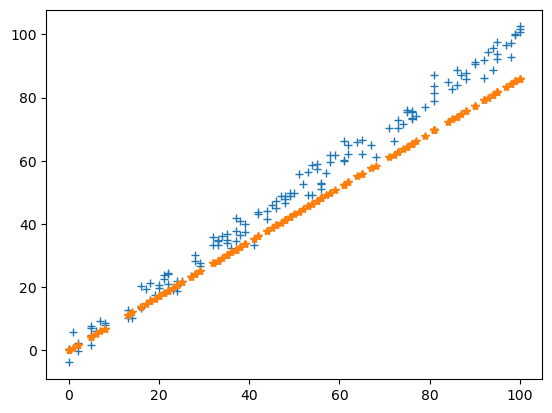

Iteration = 4, Loss = 16.883738637247966


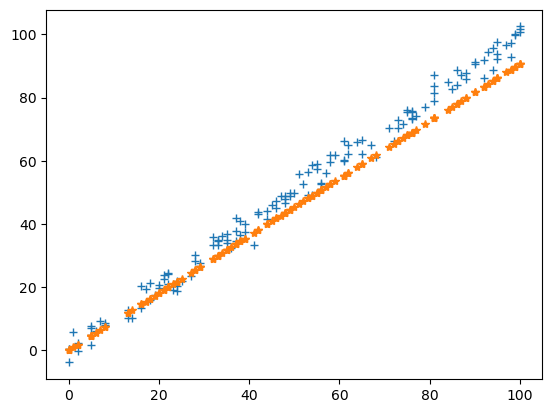

Iteration = 5, Loss = 9.166563440160097


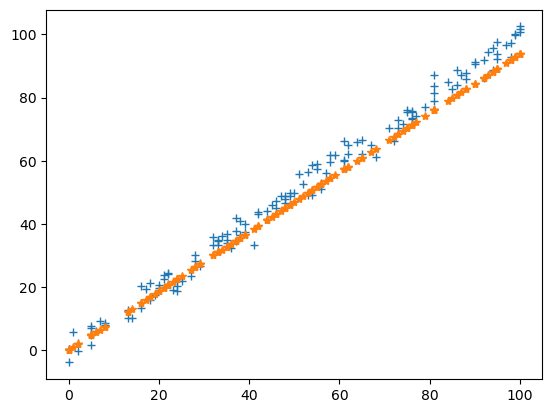

Iteration = 6, Loss = 5.849156581246652


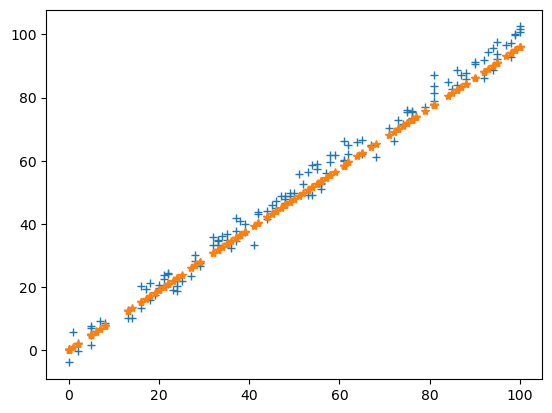

Iteration = 7, Loss = 4.444174063713377


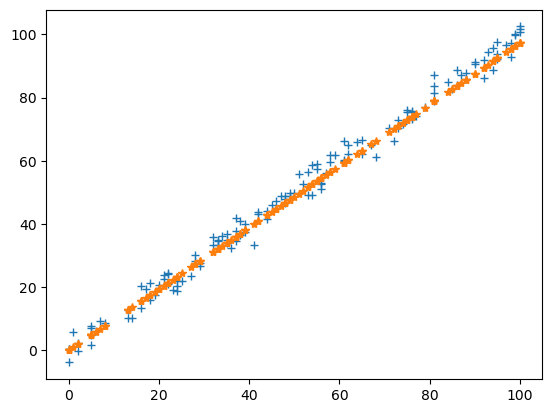

Iteration = 8, Loss = 3.8635259148249044


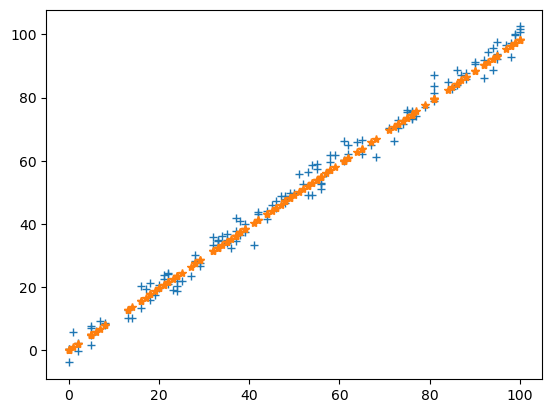

Iteration = 9, Loss = 3.6335233519548766


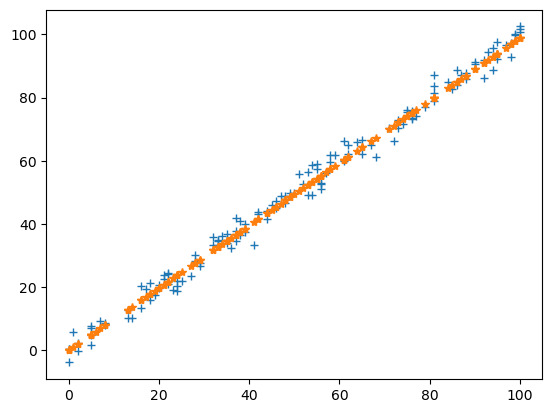

Iteration = 10, Loss = 3.5494911494869363


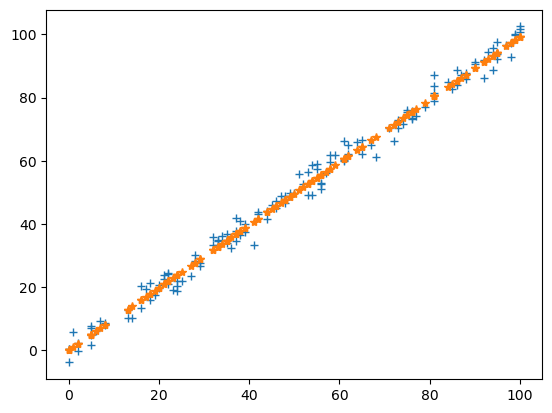

Iteration = 11, Loss = 3.5240296201931214


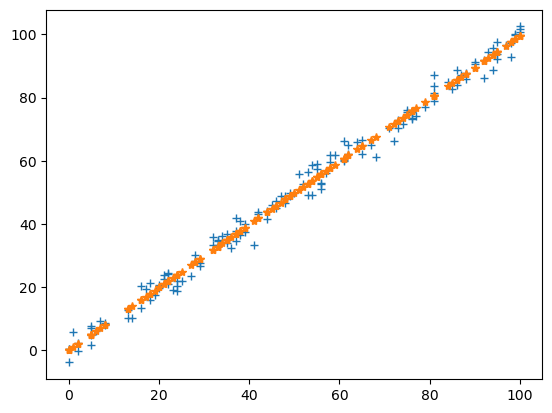

Iteration = 12, Loss = 3.5205224417705954


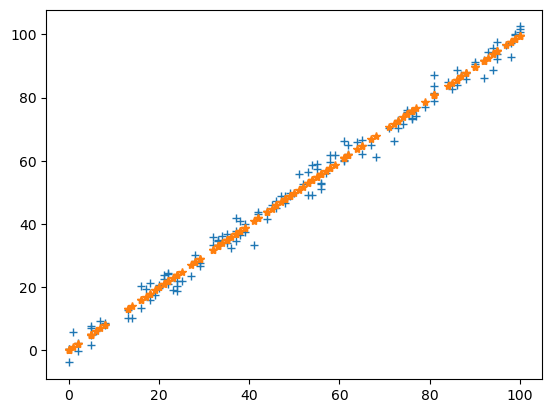

Iteration = 13, Loss = 3.524113320954602


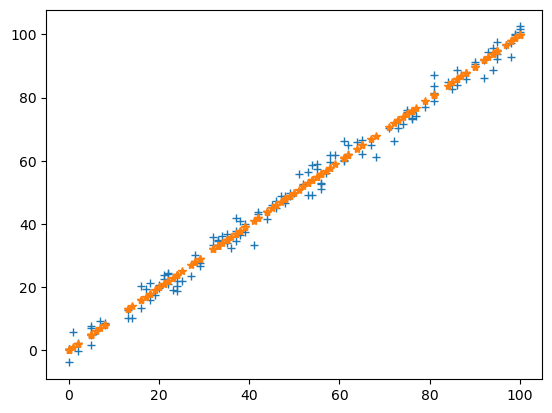

Iteration = 14, Loss = 3.5291137036561535


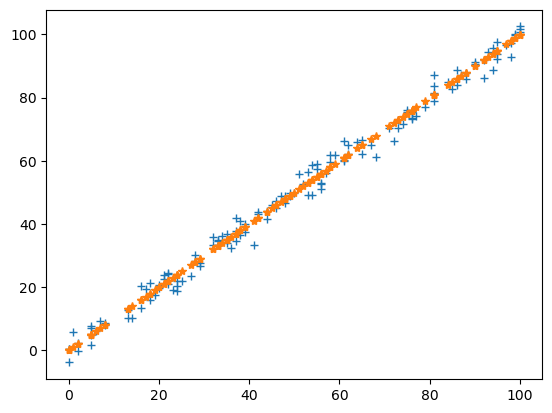

Iteration = 15, Loss = 3.5335905875847327


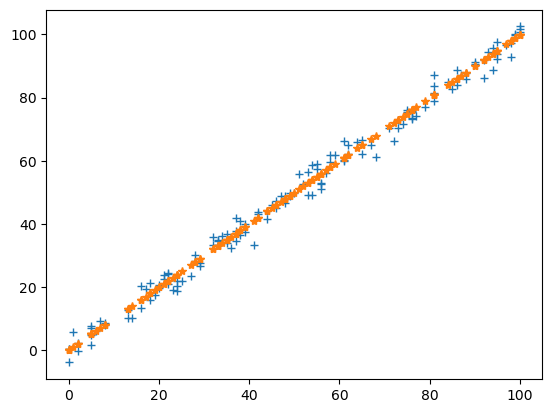

Iteration = 16, Loss = 3.537074976512597


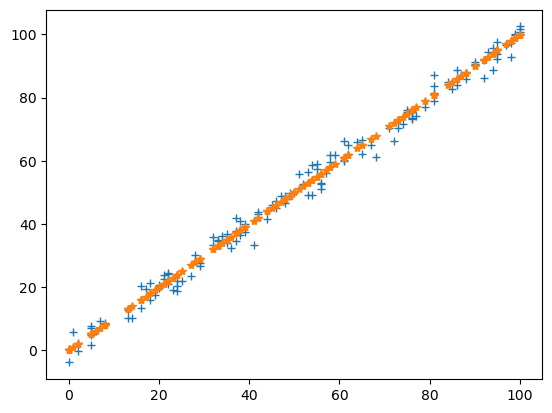

Iteration = 17, Loss = 3.5396152609700313


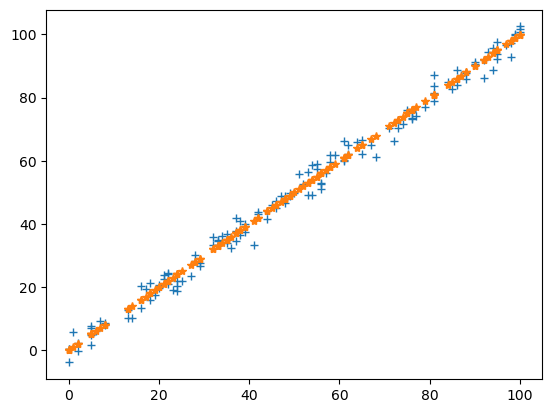

Iteration = 18, Loss = 3.54140255181795


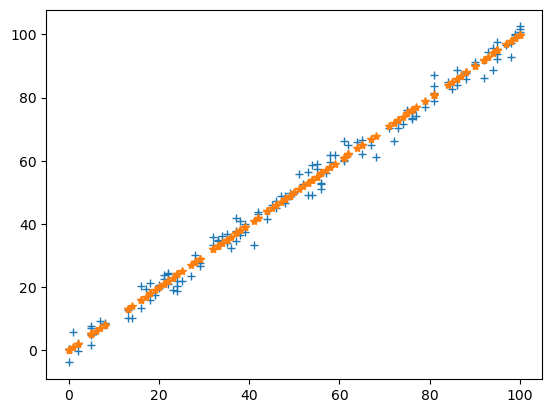

Iteration = 19, Loss = 3.542634018469635


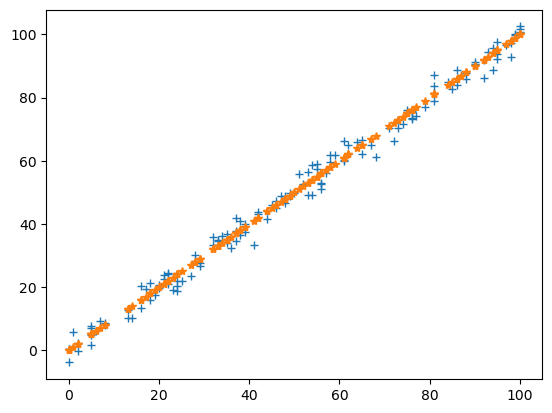

Iteration = 20, Loss = 3.5434716604864396


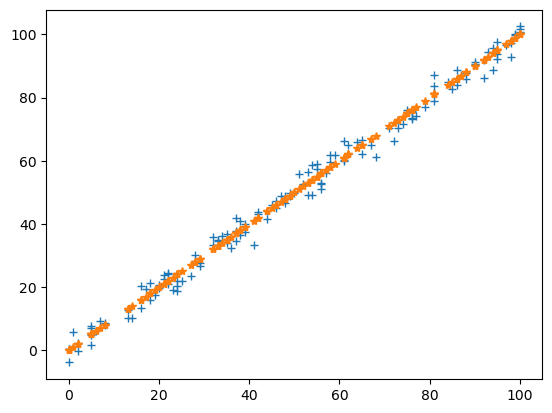

In [12]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

# Let's Predict

In [13]:
y_predict = test_input * parameters['m'] + parameters['c']

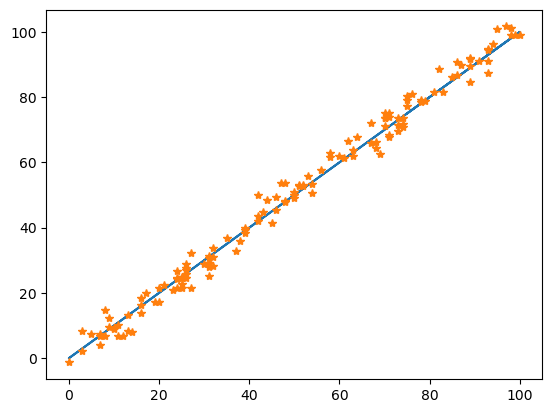

In [20]:
plt.plot(test_input,y_predict )
plt.plot(test_input,test_output ,"*")